**Using KMeans Clustering**

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

# Load the Image
image_path = "imgsegmentation1.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image into a 2D array of pixels
pixels = image_rgb.reshape((-1, 3))

# Apply K-means clustering to segment the image into 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(pixels)
segmented_image = kmeans.labels_.reshape(image_rgb.shape[0], image_rgb.shape[1])

# Create a color map for visualization (you can change the as needed)
colors = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]])  # Red, Green, Blue

# Map the labels to the colors
colored_segmented_image = colors[segmented_image]

# Convert the colored image back to BGR for OpenCV visualization
colored_segmented_image_bgr = cv2.cvtColor(colored_segmented_image.astype(np.uint8), cv2.COLOR_RGB2BGR)

# Show the Result
cv2.imshow('Segmented Image', colored_segmented_image_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Using MeanShift**

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import cv2
import numpy as np

# Load the image
image_path = "imgsegmentation1.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image into a 2D array of pixels
pixels = image_rgb.reshape((-1, 3))

# Estimate bandwidth for MeanShift
bandwidth = estimate_bandwidth(pixels, quantile = 0.1, n_samples = 500)

# Apply MeanShift clustering
mean_shift = MeanShift(bandwidth = bandwidth, bin_seeding = True)
mean_shift.fit(pixels)

# Get the labels and cluster centers
labels = mean_shift.labels_
segmented_image = labels.reshape(image_rgb.shape[0], image_rgb.shape[1])

# Create a color map for visualization (you can change the colors)
unique_labels = np.unique(labels)
colors = np.random.randint(0, 255, size = (len(unique_labels), 3))

# Map the labels to colors
colored_segmented_image = colors[segmented_image]

# Convert the colored image back to BGR for OpenCV visualization
colored_segmented_image_bgr = cv2.cvtColor(colored_segmented_image.astype(np.uint8), cv2.COLOR_RGB2BGR)

# Show the Result
cv2.imshow('Segmented Image', colored_segmented_image_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **Image segmentation using Pre Trained DeepLabv3 with Backbone resnet**

Using cache found in C:\Users\hp/.cache\torch\hub\pytorch_vision_v0.10.0


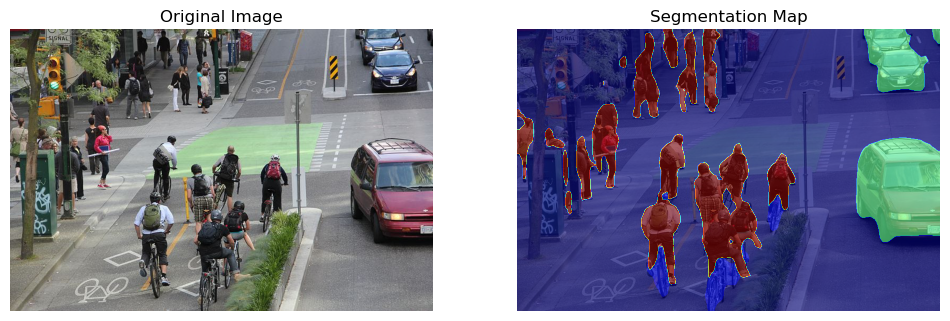

In [11]:
import torch 
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained DeepLabV3 model from PyTorch Hub
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained = True)
model.eval()   # Set the model to evaluation mode

# Preprocessing function for the input image
def preprocess_image(image_path):
    """
    Preprocess the input image to match the model's requirements.
    """
    input_image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
    transforms.ToTensor(),    # Convert PTL image to tensor
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])   # Normalize
    ])
    input_tensor = preprocess(input_image).unsqueeze(0)    # Add batch dimension
    return input_tensor, input_image

# Postprocessing function for the segmentation output
def postprocess_output(output, image_size):
    """
    Postprocess the model output to generate a segmentation map.
    """
    output_predictions = output['out'].argmax(1)[0].byte().cpu().numpy()    # Get the most probable class per pixel
    segmentation_map = Image.fromarray(output_predictions).resize(image_size, Image.NEAREST)  # Resize to original size
    return segmentation_map
# Path to your custom image
image_path = 'imgsegmentation1.jpg'  

# Preprocess the image
input_tensor, input_image = preprocess_image(image_path)
#print(input_tensor)

# Perform inference
with torch.no_grad():     # Disable gradient computation for inference
    output = model(input_tensor)

# Postprocess the output
segmentation_map = postprocess_output(output, input_image.size)


# Visualize the original image and segmentation result
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(input_image)
plt.imshow(segmentation_map, cmap = "jet", alpha = 0.6)   # Overlay segmentation map
plt.title("Segmentation Map")
plt.axis("off")
plt.show()

Using cache found in C:\Users\hp/.cache\torch\hub\pytorch_vision_v0.10.0


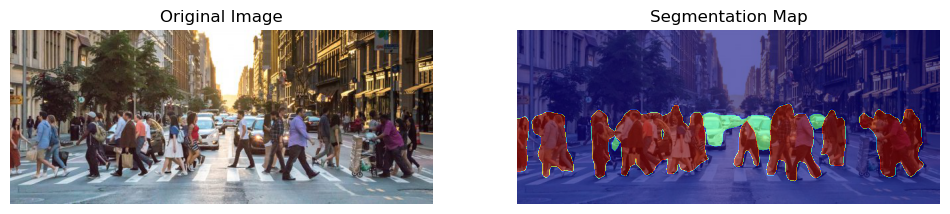

In [13]:
import torch 
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained DeepLabV3 model from PyTorch Hub
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained = True)
model.eval()   # Set the model to evaluation mode

# Preprocessing function for the input image
def preprocess_image(image_path):
    """
    Preprocess the input image to match the model's requirements.
    """
    input_image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
    transforms.ToTensor(),    # Convert PTL image to tensor
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])   # Normalize
    ])
    input_tensor = preprocess(input_image).unsqueeze(0)    # Add batch dimension
    return input_tensor, input_image

# Postprocessing function for the segmentation output
def postprocess_output(output, image_size):
    """
    Postprocess the model output to generate a segmentation map.
    """
    output_predictions = output['out'].argmax(1)[0].byte().cpu().numpy()    # Get the most probable class per pixel
    segmentation_map = Image.fromarray(output_predictions).resize(image_size, Image.NEAREST)  # Resize to original size
    return segmentation_map
# Path to your custom image
image_path = 'segmentationimg1.jpg'  

# Preprocess the image
input_tensor, input_image = preprocess_image(image_path)
#print(input_tensor)

# Perform inference
with torch.no_grad():     # Disable gradient computation for inference
    output = model(input_tensor)

# Postprocess the output
segmentation_map = postprocess_output(output, input_image.size)


# Visualize the original image and segmentation result
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(input_image)
plt.imshow(segmentation_map, cmap = "jet", alpha = 0.6)   # Overlay segmentation map
plt.title("Segmentation Map")
plt.axis("off")
plt.show()

Using cache found in C:\Users\hp/.cache\torch\hub\pytorch_vision_v0.10.0


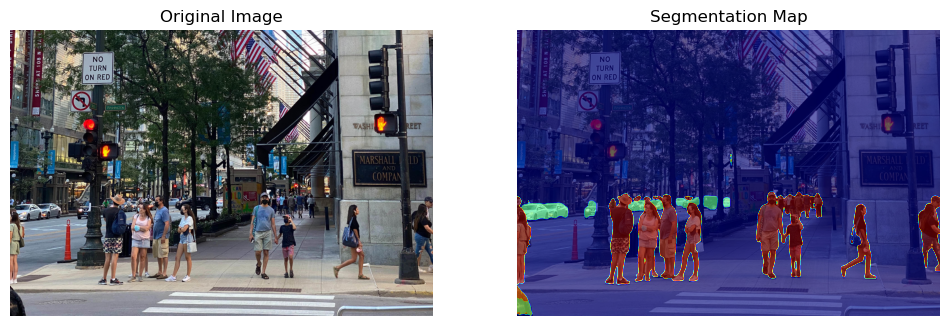

In [15]:
import torch 
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained DeepLabV3 model from PyTorch Hub
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained = True)
model.eval()   # Set the model to evaluation mode

# Preprocessing function for the input image
def preprocess_image(image_path):
    """
    Preprocess the input image to match the model's requirements.
    """
    input_image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
    transforms.ToTensor(),    # Convert PTL image to tensor
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])   # Normalize
    ])
    input_tensor = preprocess(input_image).unsqueeze(0)    # Add batch dimension
    return input_tensor, input_image

# Postprocessing function for the segmentation output
def postprocess_output(output, image_size):
    """
    Postprocess the model output to generate a segmentation map.
    """
    output_predictions = output['out'].argmax(1)[0].byte().cpu().numpy()    # Get the most probable class per pixel
    segmentation_map = Image.fromarray(output_predictions).resize(image_size, Image.NEAREST)  # Resize to original size
    return segmentation_map
# Path to your custom image
image_path = 'segmentationimg2.jpg'  

# Preprocess the image
input_tensor, input_image = preprocess_image(image_path)
#print(input_tensor)

# Perform inference
with torch.no_grad():     # Disable gradient computation for inference
    output = model(input_tensor)

# Postprocess the output
segmentation_map = postprocess_output(output, input_image.size)


# Visualize the original image and segmentation result
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(input_image)
plt.imshow(segmentation_map, cmap = "jet", alpha = 0.6)   # Overlay segmentation map
plt.title("Segmentation Map")
plt.axis("off")
plt.show()

Using cache found in C:\Users\hp/.cache\torch\hub\pytorch_vision_v0.10.0


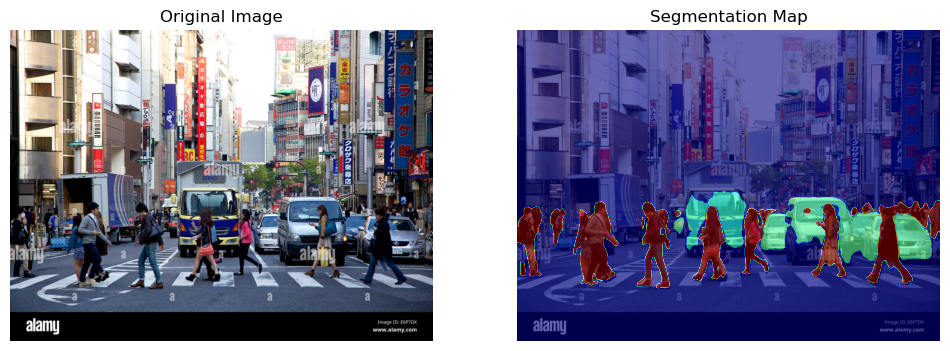

In [17]:
import torch 
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained DeepLabV3 model from PyTorch Hub
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained = True)
model.eval()   # Set the model to evaluation mode

# Preprocessing function for the input image
def preprocess_image(image_path):
    """
    Preprocess the input image to match the model's requirements.
    """
    input_image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
    transforms.ToTensor(),    # Convert PTL image to tensor
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])   # Normalize
    ])
    input_tensor = preprocess(input_image).unsqueeze(0)    # Add batch dimension
    return input_tensor, input_image

# Postprocessing function for the segmentation output
def postprocess_output(output, image_size):
    """
    Postprocess the model output to generate a segmentation map.
    """
    output_predictions = output['out'].argmax(1)[0].byte().cpu().numpy()    # Get the most probable class per pixel
    segmentation_map = Image.fromarray(output_predictions).resize(image_size, Image.NEAREST)  # Resize to original size
    return segmentation_map
# Path to your custom image
image_path = 'segmentationimg3.jpg'  

# Preprocess the image
input_tensor, input_image = preprocess_image(image_path)
#print(input_tensor)

# Perform inference
with torch.no_grad():     # Disable gradient computation for inference
    output = model(input_tensor)

# Postprocess the output
segmentation_map = postprocess_output(output, input_image.size)


# Visualize the original image and segmentation result
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(input_image)
plt.imshow(segmentation_map, cmap = "jet", alpha = 0.6)   # Overlay segmentation map
plt.title("Segmentation Map")
plt.axis("off")
plt.show()

Using cache found in C:\Users\hp/.cache\torch\hub\pytorch_vision_v0.10.0


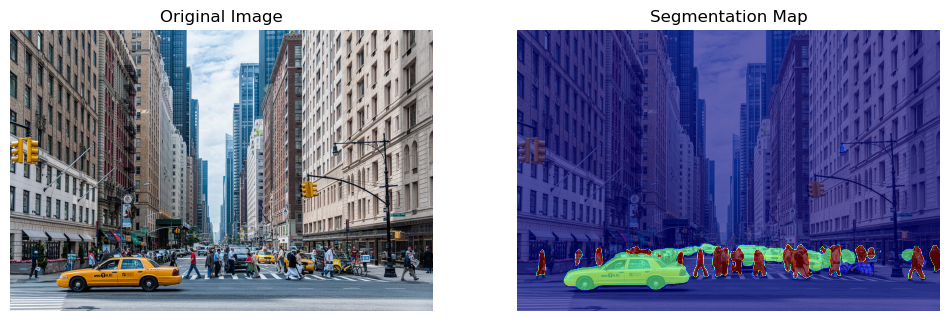

In [19]:
import torch 
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained DeepLabV3 model from PyTorch Hub
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained = True)
model.eval()   # Set the model to evaluation mode

# Preprocessing function for the input image
def preprocess_image(image_path):
    """
    Preprocess the input image to match the model's requirements.
    """
    input_image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
    transforms.ToTensor(),    # Convert PTL image to tensor
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])   # Normalize
    ])
    input_tensor = preprocess(input_image).unsqueeze(0)    # Add batch dimension
    return input_tensor, input_image

# Postprocessing function for the segmentation output
def postprocess_output(output, image_size):
    """
    Postprocess the model output to generate a segmentation map.
    """
    output_predictions = output['out'].argmax(1)[0].byte().cpu().numpy()    # Get the most probable class per pixel
    segmentation_map = Image.fromarray(output_predictions).resize(image_size, Image.NEAREST)  # Resize to original size
    return segmentation_map
# Path to your custom image
image_path = 'segmentationimg4.jpg'  

# Preprocess the image
input_tensor, input_image = preprocess_image(image_path)
#print(input_tensor)

# Perform inference
with torch.no_grad():     # Disable gradient computation for inference
    output = model(input_tensor)

# Postprocess the output
segmentation_map = postprocess_output(output, input_image.size)


# Visualize the original image and segmentation result
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(input_image)
plt.imshow(segmentation_map, cmap = "jet", alpha = 0.6)   # Overlay segmentation map
plt.title("Segmentation Map")
plt.axis("off")
plt.show()